In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

## Prepare a prediction model for profit of 50_startups data.

#### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

**R&D Spend** -- Research and devolop spend in the past few years<br>
**Administration** -- spend on administration in the past few years<br>
**Marketing Spend** -- spend on Marketing in the past few years<br>
**State** -- states from which data is collected<br>
**Profit**  -- profit of each state in the past few years<br>

In [2]:
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.shape

(50, 5)

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#REnaming the columns
ds = df.copy()
ds = ds.rename(columns={"R&D Spend":'RandD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'})
ds.head()

,RandD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
# Checking missing values
ds.isnull().sum()

RandD        0
admin        0
marketing    0
state        0
profit       0
dtype: int64

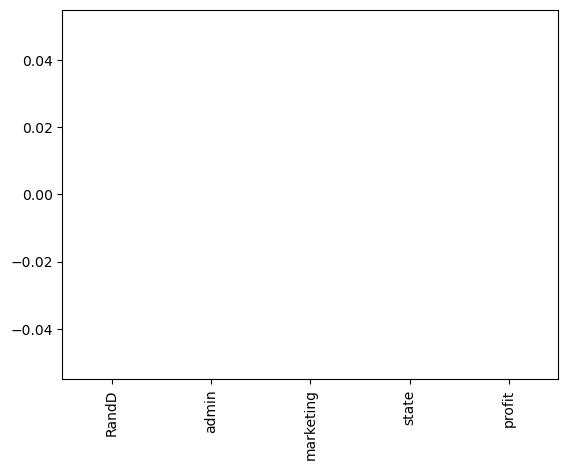

In [8]:
ds.isnull().sum().plot.bar()
plt.show()


<Axes: >

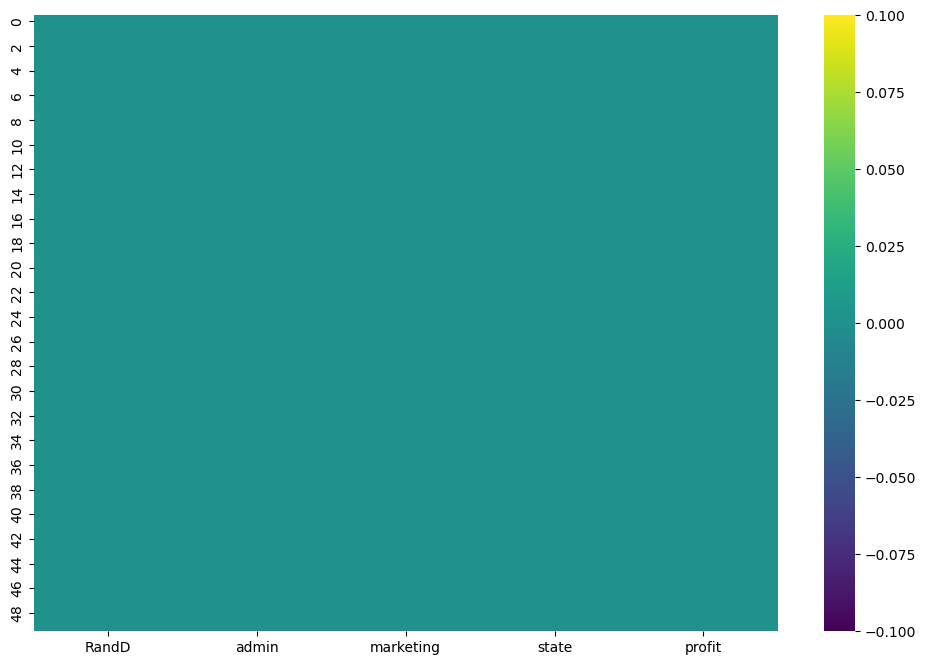

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(ds.isnull(),cmap='viridis')

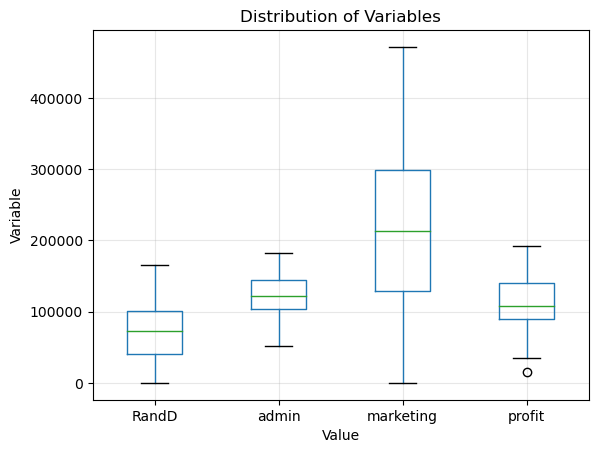

In [10]:
ds.boxplot()
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
# data_to_plot.boxplot(vert=False, showfliers=False)
plt.show()

In [11]:
# Find outlier in profit dependent variable

In [12]:
Q1 =np.quantile(ds.profit,0.25)
Q3 =np.quantile(ds.profit,0.75)
median = np.median(ds.profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', median,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [13]:
Outliers = ds.profit[(ds.profit <= lower_bound) | (ds.profit >= upper_bound)]
Outliers

49    14681.4
Name: profit, dtype: float64

In [14]:
ds.iloc[[49]]

,RandD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


#### # finding rsquared values (percentage of variance) before handling the outlier.

In [15]:

import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
model = sm.ols("profit~RandD+admin+marketing", data = ds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        18:03:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD          0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Finding rsquared values 
model.rsquared , model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

#### Median input to handle Outlier in Profit

In [17]:
#Add median for the profit outlier
ds.profit.median()

107978.19

In [18]:
ds1 = ds.copy()
ds1.iloc[[49],[4]] = ds.profit.median()

In [19]:
ds1

,RandD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [20]:
#Test our data in model and compare the R-squared with Median input in data model
median_input_model = sm.ols("profit~RandD+admin+marketing", data = ds).fit()
# Finding rsquared values
print(median_input_model.rsquared , median_input_model.rsquared_adj)
median_input_model.summary()

0.9507459940683246 0.9475337762901719


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        18:03:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD          0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observation: After median input the model is not performing well

#### Mean input to handle Outlier in Profit

In [21]:
ds2 = ds.copy()
mean = np.mean(ds2['profit'])
#mean
ds2.iloc[[49],[4]] = mean
ds2

,RandD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.8300
1,162597.70,151377.59,443898.53,California,191792.0600
2,153441.51,101145.55,407934.54,Florida,191050.3900
3,144372.41,118671.85,383199.62,New York,182901.9900
4,142107.34,91391.77,366168.42,Florida,166187.9400
5,131876.90,99814.71,362861.36,New York,156991.1200
6,134615.46,147198.87,127716.82,California,156122.5100
7,130298.13,145530.06,323876.68,Florida,155752.6000
8,120542.52,148718.95,311613.29,New York,152211.7700
9,123334.88,108679.17,304981.62,California,149759.9600


In [22]:
mean_input_model = sm.ols("profit~RandD+admin+marketing", data = ds2).fit()
# Finding rsquared values
print(mean_input_model.rsquared , mean_input_model.rsquared_adj)
mean_input_model.summary()

0.9119537155310937 0.9062115665439912


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           2.82e-24
Time:                        18:03:51   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
RandD          0.7447      0.057     13.162      0.000       0.631       0.859
admin         -0.0144      0.064     -0.226      0.823      -0.143       0.114
marketing      0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observation: After mean input the model is not performing well worse than median input module

#### Remove outlier check the module

In [23]:
ds3 = ds.copy()
ds3=ds3.drop(ds3.index[49])
ds3

,RandD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [24]:
removed_outlier_model = sm.ols("profit~RandD+admin+marketing", data = ds3).fit()
# Finding rsquared values
print(removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj)
removed_outlier_model.summary()


0.9613162435129847 0.9587373264138503


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           8.85e-32
Time:                        18:03:51   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RandD          0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observation: Slightly better than mean input  model and median input module

Text(0, 0.5, 'profit')

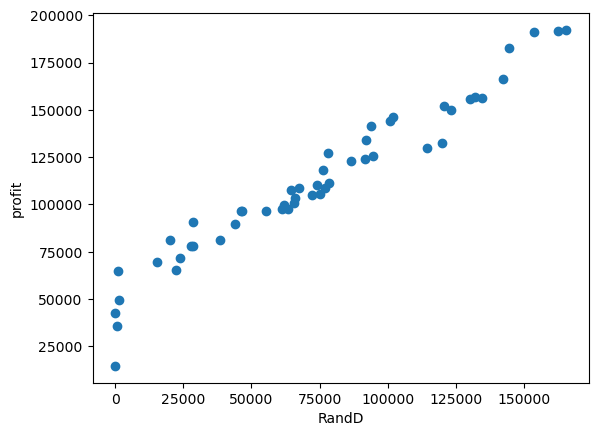

In [25]:
#EDA
plt.scatter(ds['RandD'],ds["profit"])
plt.xlabel("RandD")
plt.ylabel("profit")


Text(0, 0.5, 'profit')

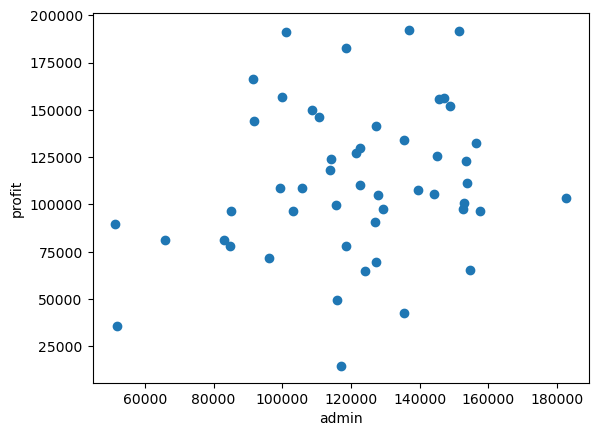

In [26]:
plt.scatter(ds['admin'],ds["profit"])
plt.xlabel("admin")
plt.ylabel("profit")

Text(0, 0.5, 'profit')

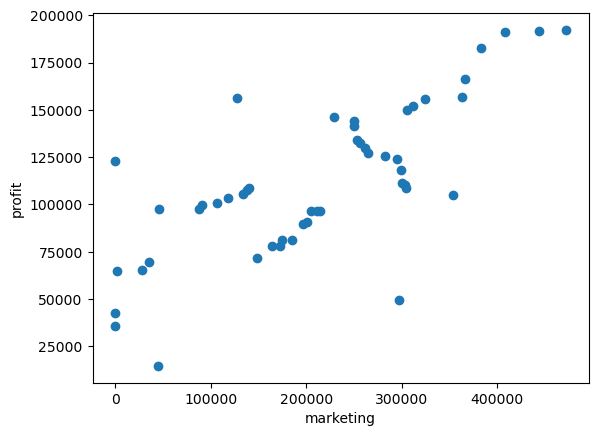

In [27]:
plt.scatter(ds['marketing'],ds["profit"])
plt.xlabel("marketing")
plt.ylabel("profit")

#### Observation: RandD feature has a good linear relation with Profit as compare to others 

### Checking the correlation between Variables

In [28]:
ds4=ds.drop('state',axis=1)
ds4.corr()

,RandD,admin,marketing,profit
RandD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


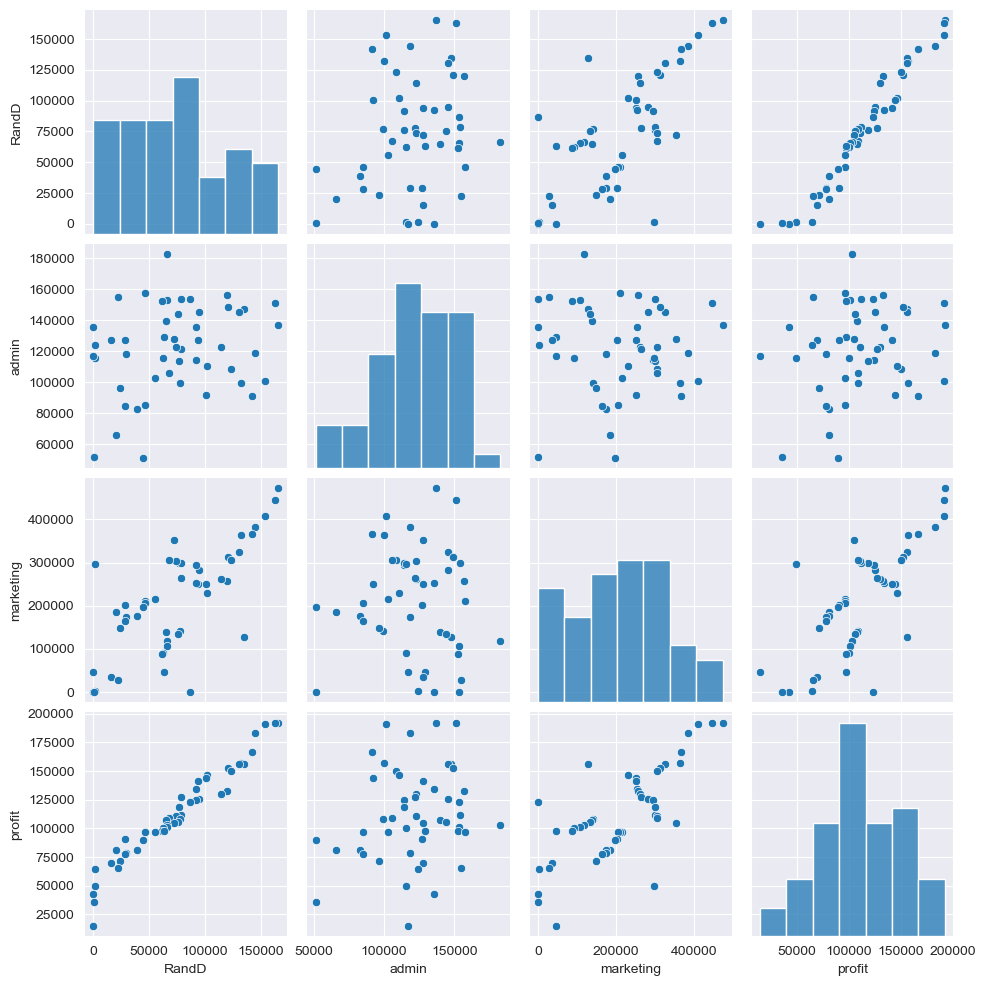

In [29]:
sns.set_style(style='darkgrid')
sns.pairplot(ds4)

#### Observation: RandD has the highest score of correlation and the linear relation with Profit

### Model building

In [30]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
model1=smf.ols("profit~RandD+admin+marketing",data=ds).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        18:03:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD          0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
import numpy as np
print("mean square error:",np.mean(model1.resid ** 2))

mean square error: 78417126.01913084


<Axes: >

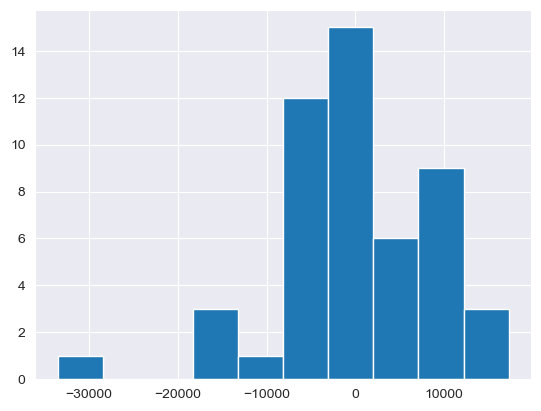

In [32]:
model1.resid.hist()

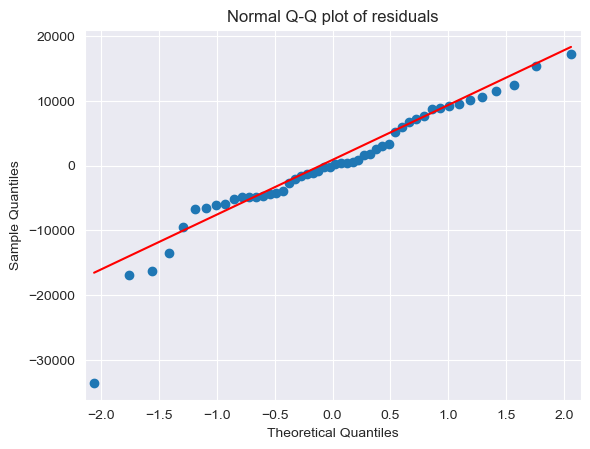

In [33]:
# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [34]:
import numpy as np
list(np.where(model.resid<-30000))


[array([49], dtype=int64)]

Text(0, 0.5, 'residual values')

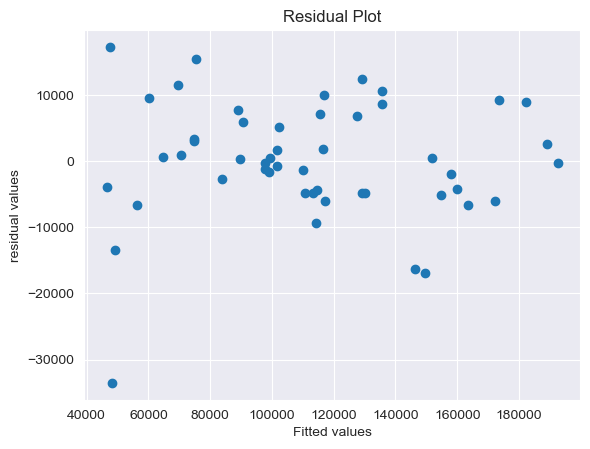

In [35]:
# no patterns no relations  --> model is acceptable model

plt.scatter(model1.fittedvalues,model1.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('residual values')


In [36]:
# Model Deletion Diagnostics
## Detecting Influencers/Outliers
## Cook’s Distance

model_influence = model1.get_influence()
model_influence
(cooks, pvalue) = model_influence.cooks_distance
cooks = pd.DataFrame(cooks)
cooks[0].describe()

count    50.000000
mean      0.022891
std       0.049837
min       0.000009
25%       0.001373
50%       0.004441
75%       0.020875
max       0.288082
Name: 0, dtype: float64

In [37]:
# Get influencers using cook's distance
(c,_)=model1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

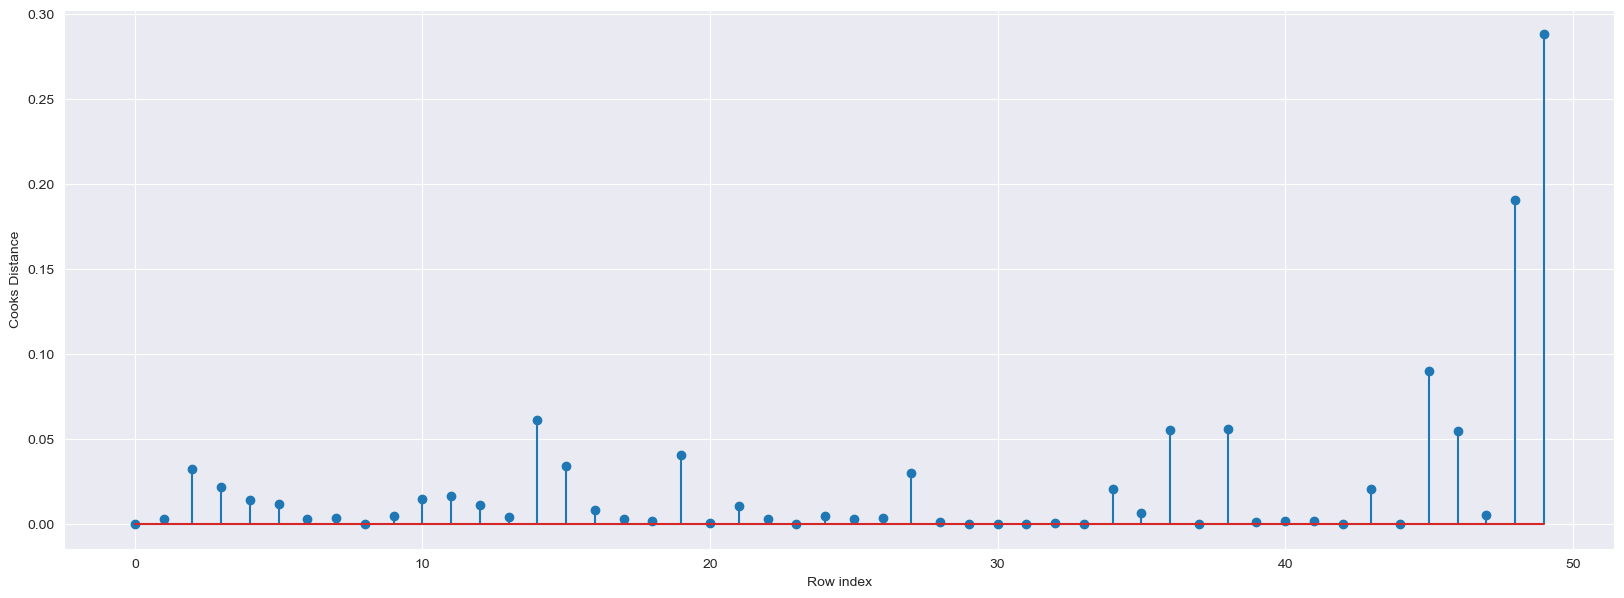

In [38]:
#Plot the influencers values using stem plot
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(ds)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)


(49, 0.28808229275432634)

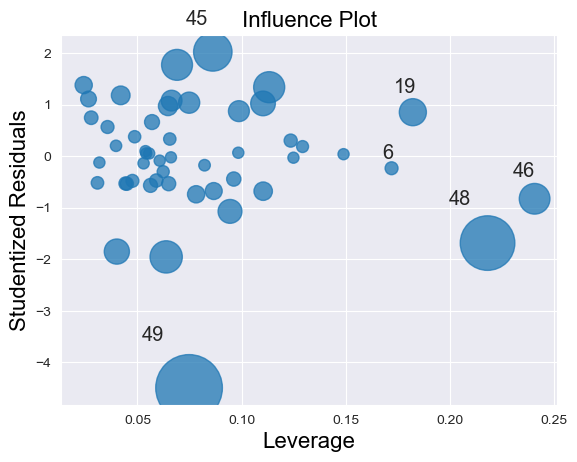

0.36

In [40]:
## High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


#### There are no influncers present in our model we can proceed with the predictions

### Model Deletion Diagnostics and Final Model

In [41]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataset=ds.drop(ds.index[[49]],axis=0).reset_index(drop=True)
dataset
# import statsmodels.formula.api as smf
# model4=smf.ols("profit~RandD+admin+marketing",data=ds).fit()
# model4.summary()

,RandD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
model5=smf.ols("profit~RandD+admin+marketing",data=dataset).fit()

In [43]:
# Cook's Distance: If Cook's distance > 1, then it's an outlier
while model5.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model5=smf.ols("profit~RandD+admin+marketing",data=dataset).fit()
        (c,_)=model5.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataset=dataset.drop(dataset.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataset
    else:
        final_model=smf.ols("profit~RandD+admin+marketing",data=dataset).fit()
        final_model.rsquared , final_model.aic
        print("Model accuracy is improved to",final_model.rsquared)

Model accuracy is improved to 0.9626766170294073
Model accuracy is improved to 0.9614129113440602
Model accuracy is improved to 0.962593650298269
Model accuracy is improved to 0.9638487279209415
Model accuracy is improved to 0.9663901957918793
Model accuracy is improved to 0.9706076169779905
Model accuracy is improved to 0.9727840588916423
Model accuracy is improved to 0.9734292907181952
Model accuracy is improved to 0.9785801571833451
Model accuracy is improved to 0.9777383743090916
Model accuracy is improved to 0.9790510088977512
Model accuracy is improved to 0.9790004461890552
Model accuracy is improved to 0.9807878666153609
Model accuracy is improved to 0.9838299343609735
Model accuracy is improved to 0.9831149926392769
Model accuracy is improved to 0.9833768520972176
Model accuracy is improved to 0.9878892536376698
Model accuracy is improved to 0.9877191935547199
Model accuracy is improved to 0.9858356627471713
Model accuracy is improved to 0.9874766829880098
Model accuracy is imp

In [44]:
print("Final model rsquared: ", final_model.rsquared )

Final model rsquared:  0.9882757054424702


In [45]:
data={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


In [46]:
models={'Different_Models':['Raw_data','Median_Input_Outlier','Mean_Input_outlier','Removed_outlier'],
        'R_squared':[model.rsquared,median_input_model.rsquared,mean_input_model.rsquared,removed_outlier_model.rsquared],
        'R_squared_adjusted':[model.rsquared_adj,median_input_model.rsquared_adj,mean_input_model.rsquared_adj,removed_outlier_model.rsquared_adj],
       'RMSE':[np.sqrt(model.mse_resid),np.sqrt(median_input_model.mse_resid),np.sqrt(mean_input_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Input_Outlier,0.950746,0.947534,9232.334837
2,Mean_Input_outlier,0.911954,0.906212,11570.325358
3,Removed_outlier,0.961316,0.958737,7753.807752
